In [52]:
import tensorflow as tf
from tensorflow import keras

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import SGD


In [13]:
import os
os.environ['KAGGLE_USERNAME']='lalloo'
os.environ['KAGGLE_KEY']='0ab12fe085708624e156b49dc75a2022'


In [6]:
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:21<00:00, 134MB/s]
100% 2.29G/2.29G [00:22<00:00, 112MB/s]


In [7]:
! unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [54]:
main_dir = '/content/chest_xray/chest_xray'
train_dir = os.path.join(main_dir,'train')
test_dir = os.path.join(main_dir,'test')
valid_dir = os.path.join(main_dir,'val')

train_normal_dir = os.path.join(train_dir, "NORMAL")
train_pneumonia_dir = os.path.join(train_dir, "PNEUMONIA")

In [55]:
train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

train_pneumonia_names = os.listdir(train_pneumonia_dir)
print(train_pneumonia_names[:10])

['NORMAL2-IM-1362-0001.jpeg', 'IM-0633-0001.jpeg', 'NORMAL2-IM-0550-0001.jpeg', 'IM-0741-0001.jpeg', 'IM-0740-0001.jpeg', 'NORMAL2-IM-0661-0001.jpeg', 'IM-0274-0001.jpeg', 'NORMAL2-IM-1276-0001.jpeg', 'NORMAL2-IM-1328-0001.jpeg', 'IM-0724-0001.jpeg']
['person1252_virus_2124.jpeg', 'person260_virus_541.jpeg', 'person543_virus_1073.jpeg', 'person815_bacteria_2726.jpeg', 'person1252_bacteria_3209.jpeg', 'person295_virus_612.jpeg', 'person1180_virus_2009.jpeg', 'person1312_bacteria_3316.jpeg', 'person1689_bacteria_4474.jpeg', 'person499_bacteria_2103.jpeg']


['/content/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1362-0001.jpeg', '/content/chest_xray/chest_xray/train/NORMAL/IM-0633-0001.jpeg', '/content/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0550-0001.jpeg', '/content/chest_xray/chest_xray/train/NORMAL/IM-0741-0001.jpeg', '/content/chest_xray/chest_xray/train/NORMAL/IM-0740-0001.jpeg', '/content/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0661-0001.jpeg', '/content/chest_xray/chest_xray/train/NORMAL/IM-0274-0001.jpeg', '/content/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1276-0001.jpeg']
['/content/chest_xray/chest_xray/train/PNEUMONIA/person1252_virus_2124.jpeg', '/content/chest_xray/chest_xray/train/PNEUMONIA/person260_virus_541.jpeg', '/content/chest_xray/chest_xray/train/PNEUMONIA/person543_virus_1073.jpeg', '/content/chest_xray/chest_xray/train/PNEUMONIA/person815_bacteria_2726.jpeg', '/content/chest_xray/chest_xray/train/PNEUMONIA/person1252_bacteria_3209.jpeg', '/content/chest_xray/chest_xray/train/PNEUMONIA/person295_v

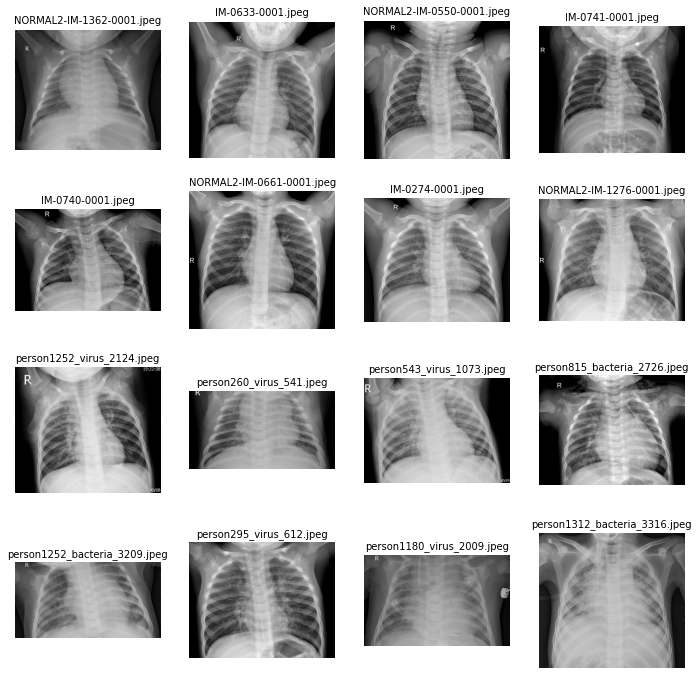

In [56]:
import matplotlib.image as mpimg
nrows =4
ncols =4
plt.figure(figsize=(12,12))


normal_pic = []
for i in train_normal_names[:8]:
  normal_pic.append(os.path.join(train_normal_dir,i))

pneumonia_pic = []
for i in train_pneumonia_names[:8]:
  pneumonia_pic.append(os.path.join(train_pneumonia_dir,i))

print(normal_pic)
print(pneumonia_pic)

merged_list = normal_pic + pneumonia_pic

for i in range(0, len(merged_list)):
  data = merged_list[i].split('/',6)[6]
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_list[i])
  sp.set_title(data, fontsize=10)
  plt.imshow(image, cmap='gray')

plt.show()


In [59]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                     featurewise_center= True,
                                     featurewise_std_normalization = True
                                   )

validation_datagen = ImageDataGenerator(rescale=1./255,                                     
                                     featurewise_center= True,
                                     featurewise_std_normalization = True)

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size=32
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    classes =('NORMAL','PNEUMONIA'),
                                                    batch_size=batch_size, 
                                                    target_size=(224, 224))
validation_generator = validation_datagen.flow_from_directory(valid_dir,
                                                         classes =('NORMAL','PNEUMONIA'),
                                                    batch_size=batch_size, 
                                                    target_size=(224, 224))

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  classes =('NORMAL','PNEUMONIA'),
                                                  batch_size=batch_size, 
                                                  target_size=(224, 224))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [60]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [61]:
train_generator.image_shape

(224, 224, 3)

In [62]:
validation_generator.image_shape

(224, 224, 3)

In [63]:
model = Sequential()

#first block of CNN
model.add(Conv2D(32,(3,3),padding='same',activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

#second block of CNN
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#third block of CNN
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#flatten and fully connect
model.add(Flatten())
model.add(Dense(1000,activation='relu'))

#softmax classifier
model.add(Dense(2, activation='softmax'))

#display model
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 28, 28, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 100352)           

In [64]:
model.compile(SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
epochs = 20
history = model.fit_generator(train_generator, 
                              steps_per_epoch=len(train_generator),
                              validation_data=validation_generator, 
                              validation_steps=len(validation_generator), 
                              epochs=epochs, 
                              verbose=1)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
163/163 [==============================] - 663s 4s/step - loss: 0.4472 - accuracy: 0.7709 - val_loss: 0.5866 - val_accuracy: 0.6875
Epoch 2/20
163/163 [==============================] - 663s 4s/step - loss: 0.3299 - accuracy: 0.8760 - val_loss: 0.7367 - val_accuracy: 0.6250
Epoch 3/20
163/163 [==============================] - 662s 4s/step - loss: 0.2512 - accuracy: 0.9068 - val_loss: 0.5406 - val_accuracy: 0.7500
Epoch 4/20
163/163 [==============================] - 663s 4s/step - loss: 0.2098 - accuracy: 0.9195 - val_loss: 0.7726 - val_accuracy: 0.6250
Epoch 5/20
163/163 [==============================] - 663s 4s/step - loss: 0.1858 - accuracy: 0.9281 - val_loss: 0.5848 - val_accuracy: 0.6875
Epoch 6/20
163/163 [==============================] - 654s 4s/step - loss: 0.1693 - accuracy: 0.9337 - val_loss: 0.3863 - val_accuracy: 0.8125
Epoch 7/20
163/163 [==============================] - 656s 4s/step - loss: 0.1752 - accuracy: 0.9319 - val_loss: 0.9702 - val_accuracy: 0.6250

In [69]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'Loss')

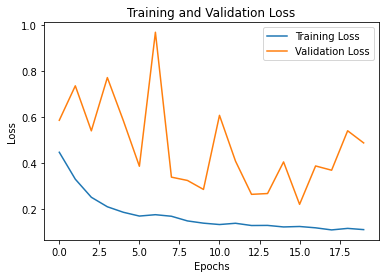

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', "Validation Loss"])
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

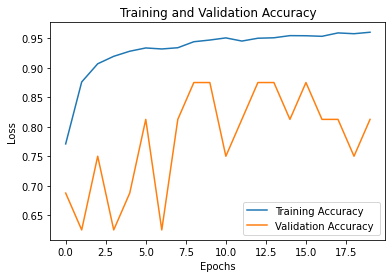

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy', "Validation Accuracy "])
plt.title("Training and Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [73]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Loss",test_loss*100)
print('Test Accuracy',test_acc)

20/20 [==============================] - 23s 1s/step - loss: 0.8391 - accuracy: 0.7532
Test Loss 83.91364812850952
Test Accuracy 0.7532051205635071


In [74]:
# not achieve the desired accuracy and loss. with consideration for hyperparameter tuning